In [1]:
import qiskit
from qiskit import QuantumCircuit

In [2]:
def stean_code(qc):
    [qc.h for qc in [0,1,3]]

In [8]:
qc = QuantumCircuit(7)
for i in [0, 1, 3]:
    qc.h(i)
for i in [4, 5]:
    qc.cx(2, i)
for i in [2, 4, 6]:
    qc.cx(0, i)
for i in [2, 5, 6]:
    qc.cx(1, i)
for i in [4, 5, 6]:
    qc.cx(3, i)
qc.draw()

┌───┐                                                  
q_0: ┤ H ├────────────■────■─────────■──────────────────────
     ├───┤            │    │         │                      
q_1: ┤ H ├────────────┼────┼────■────┼────■────■────────────
     └───┘          ┌─┴─┐  │  ┌─┴─┐  │    │    │            
q_2: ───────■────■──┤ X ├──┼──┤ X ├──┼────┼────┼────────────
     ┌───┐  │    │  └───┘  │  └───┘  │    │    │            
q_3: ┤ H ├──┼────┼─────────┼────■────┼────┼────┼────■────■──
     └───┘┌─┴─┐  │       ┌─┴─┐┌─┴─┐  │    │    │    │    │  
q_4: ─────┤ X ├──┼───────┤ X ├┤ X ├──┼────┼────┼────┼────┼──
          └───┘┌─┴─┐     └───┘└───┘  │  ┌─┴─┐  │  ┌─┴─┐  │  
q_5: ──────────┤ X ├─────────────────┼──┤ X ├──┼──┤ X ├──┼──
               └───┘               ┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐
q_6: ──────────────────────────────┤ X ├─────┤ X ├─────┤ X ├
                                   └───┘     └───┘     └───┘

In [13]:
def stean_code(qc, first_qubit):
    for i in [0, 1, 3]:
        qc.h(i + first_qubit)
    for i in [4, 5]:
        qc.cx(2 + first_qubit, i + first_qubit)
    for i in [2, 4, 6]:
        qc.cx(0 + first_qubit, i + first_qubit)
    for i in [2, 5, 6]:
        qc.cx(1 + first_qubit, i + first_qubit)
    for i in [4, 5, 6]:
        qc.cx(3 + first_qubit, i + first_qubit)

def decode(qc):
    for i in [6, 5, 4]:
        qc.cx(3, i)
    for i in [6, 5, 2]:
        qc.cx(1, i)
    for i in [6, 4, 2]:
        qc.cx(0, i)
    for i in [5, 4]:
        qc.cx(2, i)
    for i in [3, 1, 0]:
        qc.h(i)
    

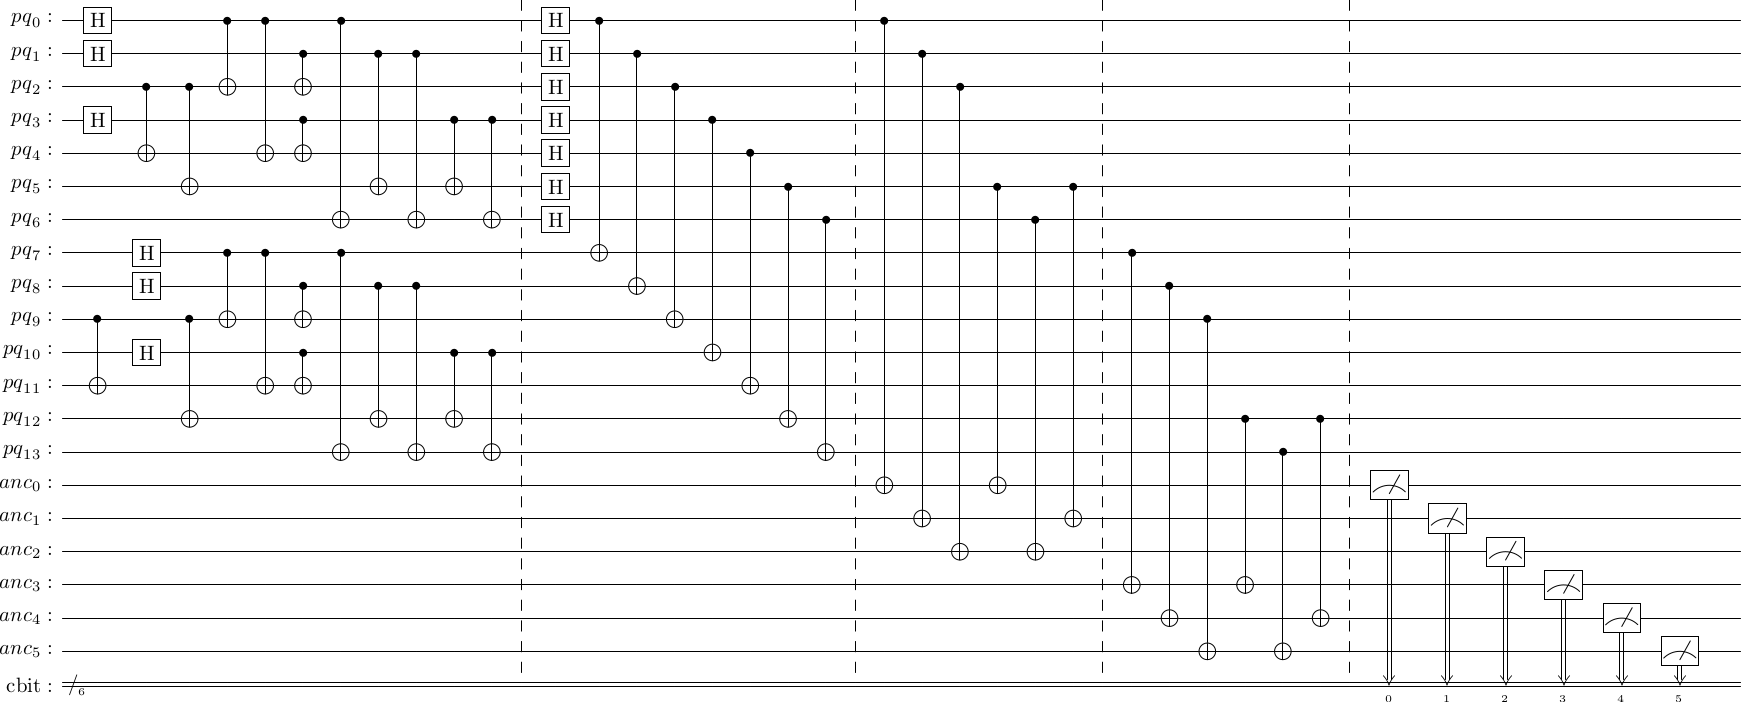

In [32]:
qc = qiskit.QuantumRegister(14, name='pq')
anc = qiskit.QuantumRegister(6, name='anc')
cbit = qiskit.ClassicalRegister(6, name='cbit')
qc1 = QuantumCircuit(qc, anc, cbit)

# encode logical qubit with stean code
stean_code(qc1, 0)
stean_code(qc1, 7)
qc1.barrier()

# create logical bell pair
for i in range(7):
    qc1.h(i)
for i in range(7):
    qc1.cx(i, i+7)
qc1.barrier()

# syndome measurement 1
qc1.cx(0, 14)
qc1.cx(5, 14)
qc1.cx(1, 15)
qc1.cx(5, 15)
qc1.cx(2, 16)
qc1.cx(6, 16)
qc1.barrier()
# syndome measurement 2
qc1.cx(7, 17)
qc1.cx(12, 17)
qc1.cx(8, 18)
qc1.cx(12, 18)
qc1.cx(9, 19)
qc1.cx(13, 19)

qc1.barrier()
# generate error here

qc1.barrier()
for i in range(6):
    qc1.measure(14+i, i)

qc1.draw(output='latex')